In [ ]:
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [ ]:
# Importing the dataset
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


In [ ]:
# printing the training and testing shape
print('Training data shape :', train_images.shape, train_labels.shape)
print('Testing data shape :', test_images.shape, test_labels.shape)

Training data shape : (50000, 32, 32, 3) (50000, 1)
Testing data shape : (10000, 32, 32, 3) (10000, 1)


In [ ]:
# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : [3]')

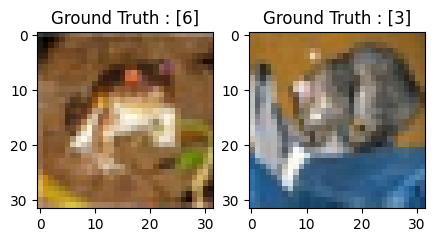

In [ ]:
# Plots ->
plt.figure(figsize = (5, 3))

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0, :, :], cmap = 'gray')
plt.title("Ground Truth : {}".format(train_labels[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0, :, :], cmap = 'gray')
plt.title("Ground Truth : {}".format(test_labels[0]))

In [ ]:
# Please refer for documentation -> https://www.kaggle.com/c/cifar-10/

In [ ]:
# Reshaping the data
nRows, nCols, nDims = train_images.shape[1:]
train_data = train_images.reshape(train_images.shape[0], nRows, nCols, nDims)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols, nDims)

input_shape = (nRows, nCols, nDims)

train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

In [ ]:
# Normalizing the data
train_data /= 255
test_data /= 255

# One Hot Encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [ ]:
# Displaying target variable
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical (one-hot) : ', train_labels_one_hot[0])

Original label 0 :  [6]
After conversion to categorical (one-hot) :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
# Displaying target variable
print('Original label 1 : ', train_labels[1])
print('After conversion to categorical (one-hot) : ', train_labels_one_hot[1])

Original label 1 :  [9]
After conversion to categorical (one-hot) :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
# Designing the architecture of the Neural Network
def createModel():
  model = Sequential()
  # The first two layers with 32 filters of window size 3X3
  model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu'))
  model.add(Conv2D(32, (3, 3), activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))
  model.add(Conv2D(64, (3, 3), activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))
  model.add(Conv2D(64, (3, 3), activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512, activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(nClasses, activation = 'softmax'))

  return model

In [ ]:
# Model Compiling Process
model1 = createModel()
batch_size = 256
epochs = 10
model1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Evaluating the model
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Fitting the model
history = model1.fit(train_data, train_labels_one_hot,
                     batch_size = batch_size, epochs = epochs,
                     verbose = 1, validation_data = (test_data, test_labels_one_hot))

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 233s 1s/step - accuracy: 0.2016 - loss: 2.0840 - val_accuracy: 0.4265 - val_loss: 1.5378
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 246s 1s/step - accuracy: 0.4361 - loss: 1.5179 - val_accuracy: 0.5292 - val_loss: 1.2850
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 256s 1s/step - accuracy: 0.5254 - loss: 1.3046 - val_accuracy: 0.6077 - val_loss: 1.1017
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 259s 1s/step - accuracy: 0.5833 - loss: 1.1623 - val_accuracy: 0.6352 - val_loss: 1.0312
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 211s 1s/step - accuracy: 0.6191 - loss: 1.0692 - val_accuracy: 0.6684 - val_loss: 0.9339
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.6509 - loss: 0.9875 - val_accuracy: 0.6618 - val_loss: 0.9624
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.6756 - loss: 0.9244 - val_accuracy: 0.7091 - val_loss: 0.8408
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 204s 1s/step - accuracy: 0.6884 - loss: 0.8811 - val_accu

In [ ]:
# Evaluating the performance of the model on testing data
model1.evaluate(test_data, test_labels_one_hot)

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7513 - loss: 0.7048


[0.7142370939254761, 0.7512000203132629]

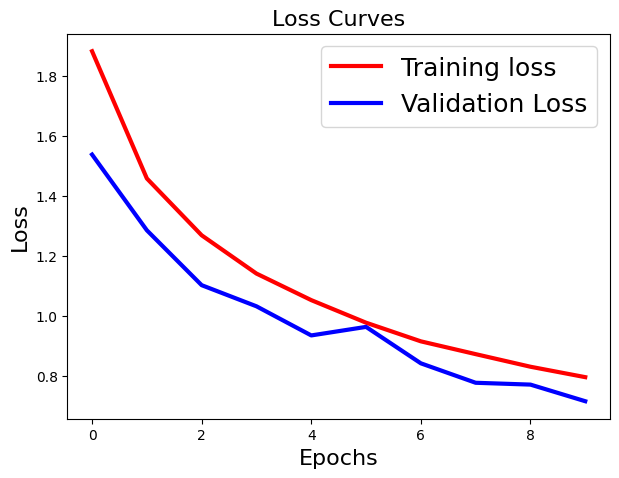

In [ ]:
# Loss Curves
plt.figure(figsize = (7, 5))
plt.plot(history.history['loss'], 'r', linewidth = 3.0)
plt.plot(history.history['val_loss'], 'b', linewidth = 3.0)
plt.legend(['Training loss', 'Validation Loss'], fontsize = 18)
plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Loss', fontsize = 16)
plt.title('Loss Curves', fontsize = 16)
plt.show()

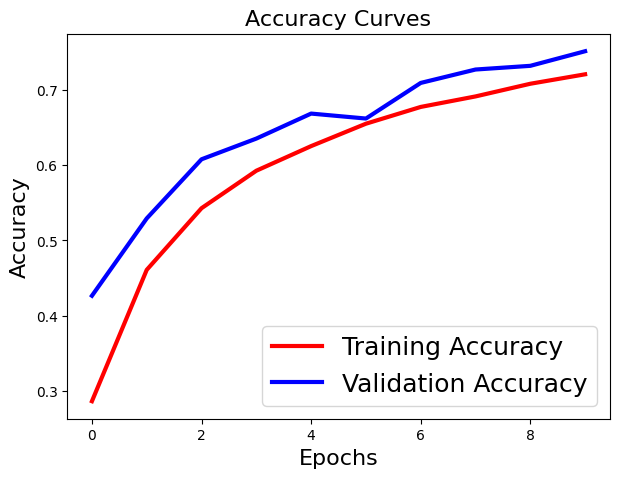

In [ ]:
# Accuracy Curves
plt.figure(figsize = (7, 5))
plt.plot(history.history['accuracy'], 'r', linewidth = 3.0)
plt.plot(history.history['val_accuracy'], 'b', linewidth = 3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize = 18)
plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)
plt.title('Accuracy Curves', fontsize = 16)
plt.show()